In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
# The library we need to build the model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# These are the library we need for model evalulation

import joblib
from sklearn.pipeline import Pipeline
# Library to export and build the model

%matplotlib inline

In [2]:
df=pd.read_csv('/home/yash/Data/kaggle_data/Nuclear data.csv')
df
#Imported the dataset which contained the data point 

,Energy Theo,Energy Expt,Log ft theo,Log ft expt
0,1306,1636,4.309,5.07
1,2606,4266,4.997,5.80
2,0,247,3.921,4.25
3,2452,2497,5.173,5.30
4,1285,1495,5.731,5.70
...,...,...,...,...
68,3105,3020,6.788,5.50
69,617,686,3.746,5.60
70,844,965,4.202,5.20
71,1487,1504,5.444,5.60


Text(0, 0.5, 'Theoretical Energy')

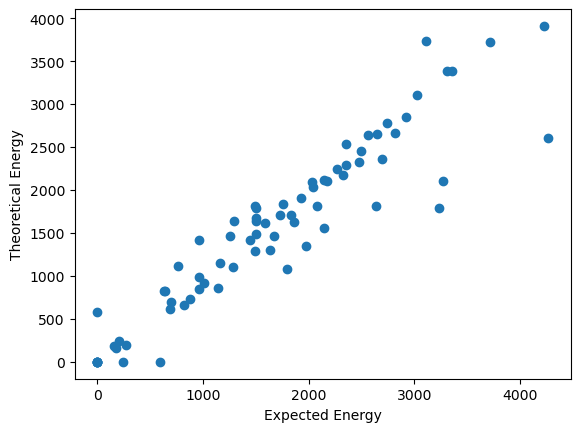

In [3]:
plt.scatter(df['Energy Expt'],df['Energy Theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#This is the scatter plot of the data point that we have to work with

Text(0, 0.5, 'Theoretical Energy')

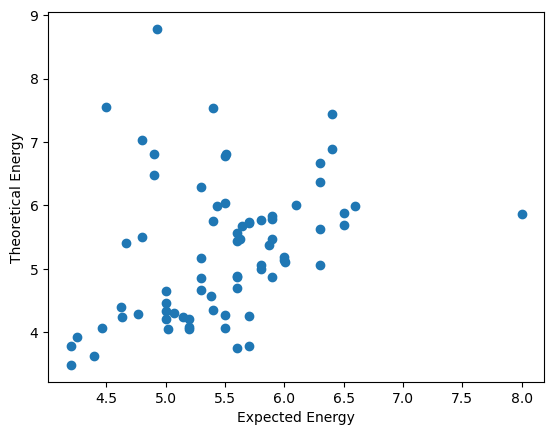

In [4]:
plt.scatter(df['Log ft expt'],df['Log ft theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#This is the scatter plot of the data point that we have to work with

In [5]:
lin=LinearRegression()
lin_log_ft=LinearRegression()

In [6]:
lin.fit(df[['Energy Expt']],df[['Energy Theo']])

LinearRegression()

In [7]:
slope_energy=lin.coef_#slope of the best fit line 

intercep_energy=lin.intercept_#y intercept of the best fit line 

Text(0, 0.5, 'Theoretical Energy')

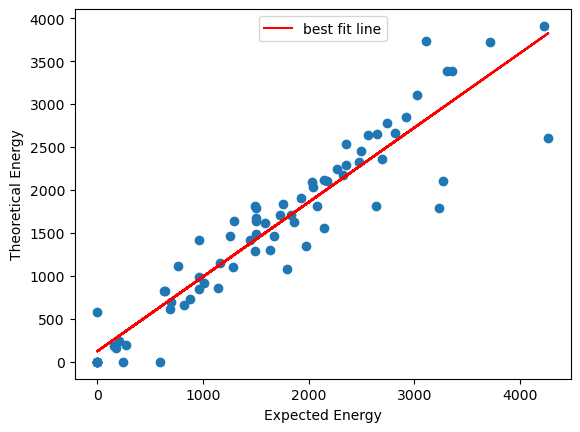

In [8]:
plt.scatter(df['Energy Expt'],df['Energy Theo'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df['Energy Expt'],lin.predict(df[['Energy Expt']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [9]:
print('slope:{} y intercept:{}'.format(slope_energy,intercep_energy))

slope:[[0.86748487]] y intercept:[124.14519704]


## Things left to do
### 1) Average error in the slope 
### 2) Putting in the log ft value 
### 3) Calculating the R(GT) value 

In [10]:
lin_log_ft.fit(df[['Log ft expt']],df[['Log ft theo']])

LinearRegression()

Text(0, 0.5, 'Theoretical Energy')

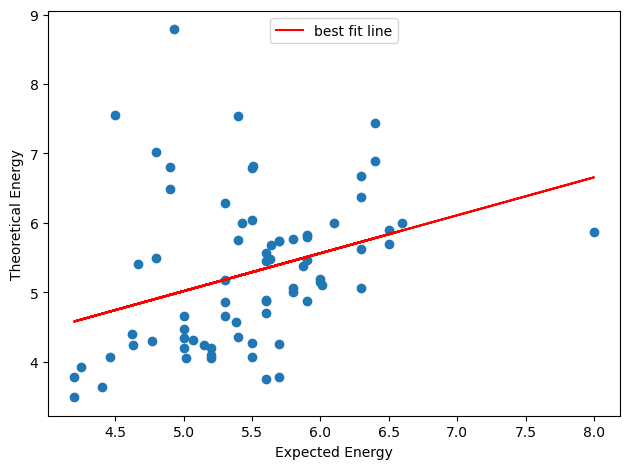

In [11]:
plt.scatter(df['Log ft expt'],df['Log ft theo'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df['Log ft expt'],lin_log_ft.predict(df[['Log ft expt']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [12]:
df_test=pd.read_csv('/home/yash/Data//kaggle_data/Nuclear data_test.csv')
df_test

,RGT Expt,RGT Theo
0,0.536584,0.519625
1,0.034761,0.599895
2,0.086315,0.095568
3,0.092489,0.110448
4,0.041313,0.068579
...,...,...
83,0.037206,0.025097
84,0.005504,0.017145
85,0.002357,0.003741
86,0.007160,0.007599


Text(0, 0.5, 'Theoretical Energy')

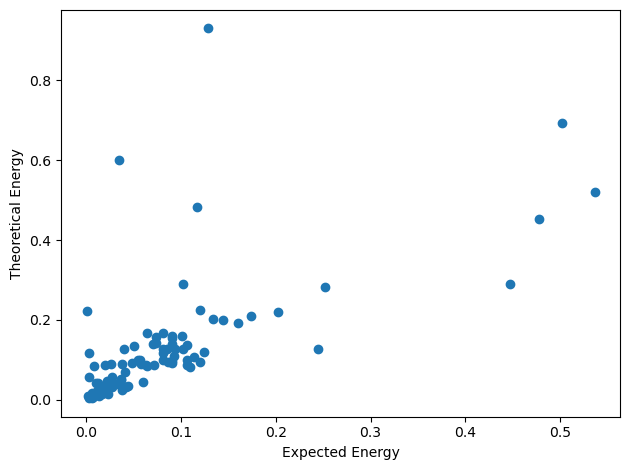

In [13]:
plt.scatter(df_test['RGT Expt'],df_test['RGT Theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#slope =0.069+-0.020
#This is the scatter plot of the data point that we have to work with

In [14]:
Linear_regression_RGT=LinearRegression()

In [15]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df_test[['RGT Theo']],df_test[['RGT Expt']],test_size=0.40)

In [16]:
Linear_regression_RGT.fit(Xtrain,Ytrain)

LinearRegression()

In [17]:
slope_model=Linear_regression_RGT.coef_
slope_model

array([[0.31660245]])

In [18]:
intercept_model=Linear_regression_RGT.intercept_
intercept_model

array([0.03815137])

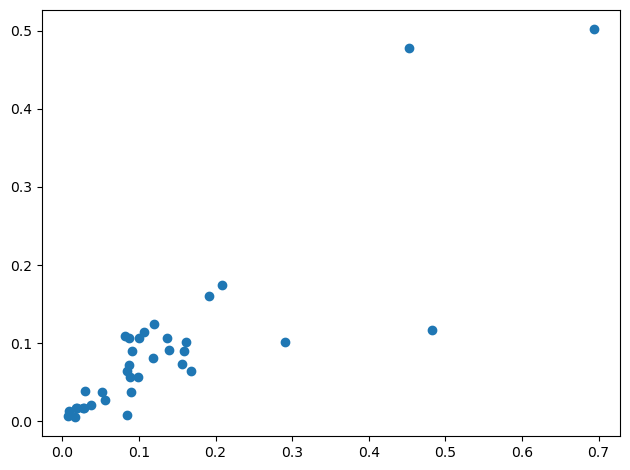

In [19]:
plt.scatter(Xtest,Ytest)

In [20]:
Y_pred=Linear_regression_RGT.predict(df_test[['RGT Theo']])

In [21]:
df_test.columns

Index(['RGT Expt', 'RGT Theo'], dtype='object')

Text(0, 0.5, 'Theoretical Energy')

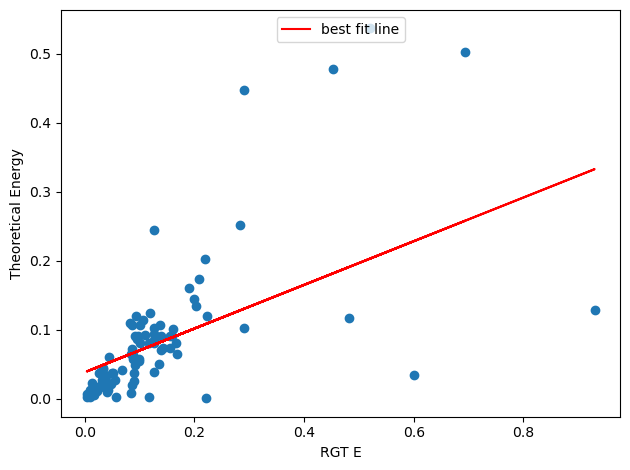

In [22]:
plt.scatter(df_test['RGT Theo'],df_test['RGT Expt'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df_test[['RGT Theo']],Linear_regression_RGT.predict(df_test[['RGT Theo']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('RGT E')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [23]:
def function_slope():
    slope=0
    slope_cal_not_done=True
    while(slope_cal_not_done):
        Xtrain,Xtest,Ytrain,Ytest = train_test_split(df_test[['RGT Theo']],df_test[['RGT Expt']],test_size=0.40)
        Linear_regression_RGT.fit(Xtrain,Ytrain)
        slope=Linear_regression_RGT.coef_
        slope
        print (slope)
        if((slope>0.66) and(slope<0.67)):
            slope_cal_not_done=False
    
    return(slope)

In [24]:
slope_RGT=function_slope()

[[0.60886282]]
[[0.47099132]]
[[0.72845413]]
[[0.35878185]]
[[0.25006064]]
[[0.25589425]]
[[0.42289952]]
[[0.421968]]
[[0.36713188]]
[[0.44827239]]
[[0.61653686]]
[[0.33903339]]
[[0.76564878]]
[[0.47475539]]
[[0.7147624]]
[[0.26350481]]
[[0.34597466]]
[[0.39272815]]
[[0.81372675]]
[[0.32921859]]
[[0.33540809]]
[[0.56305411]]
[[0.54090653]]
[[0.35309066]]
[[0.37347586]]
[[0.37447006]]
[[0.64461879]]
[[0.34230212]]
[[0.31377391]]
[[0.81707551]]
[[0.4856764]]
[[0.34823989]]
[[0.60157445]]
[[0.437498]]
[[0.40449538]]
[[0.36165857]]
[[0.93167114]]
[[0.52259594]]
[[0.34708924]]
[[0.78552322]]
[[0.51332198]]
[[0.52113194]]
[[0.51526115]]
[[0.41216833]]
[[0.36482854]]
[[0.33560578]]
[[0.61588248]]
[[0.30409047]]
[[0.20760678]]
[[0.42051059]]
[[0.36237387]]
[[0.49308928]]
[[0.54433072]]
[[0.17505147]]
[[0.5811045]]
[[0.94744504]]
[[0.42135448]]
[[0.41160754]]
[[0.3572734]]
[[0.41422359]]
[[0.26766862]]
[[0.41686891]]
[[0.39145328]]
[[0.64933431]]
[[0.41137258]]
[[0.15592373]]
[[0.24165164]]
[[0

Text(0, 0.5, 'RGT Expterimental')

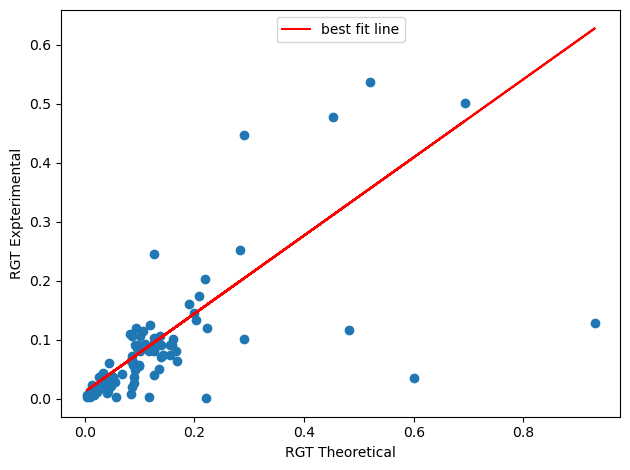

In [25]:
plt.scatter(df_test['RGT Theo'],df_test['RGT Expt'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df_test['RGT Theo'],Linear_regression_RGT.predict(df_test[['RGT Theo']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('RGT Theoretical')
plt.ylabel('RGT Expterimental')
#print the legend of the graph

joblib.dump(Linear_regression_RGT,"Linear_Regression_RGT_slope_0.665.joblib")

In [26]:
Nuclear_half_live =pd.read_csv('/home/yash/Data//kaggle_data/Nuclear half life.csv')

In [27]:
Nuclear_half_live

,Half life theo,Half life expt,mass number,Name_element,B_GT
0,251.90,460.0,52,SC,0.1004
1,268.87,461.0,53,SC,0.1400
2,186.70,86.0,54,SC,0.8950
3,18.51,22.0,55,SC,0.0902
4,1.56,11.0,56,SC,0.7990
...,...,...,...,...,...
74,393.00,570.0,76,Ga,0.2640
75,110.00,208.0,77,Ga,0.0680
76,51.00,147.0,78,Ga,0.2670
77,450.88,995.0,79,Ga,0.0560


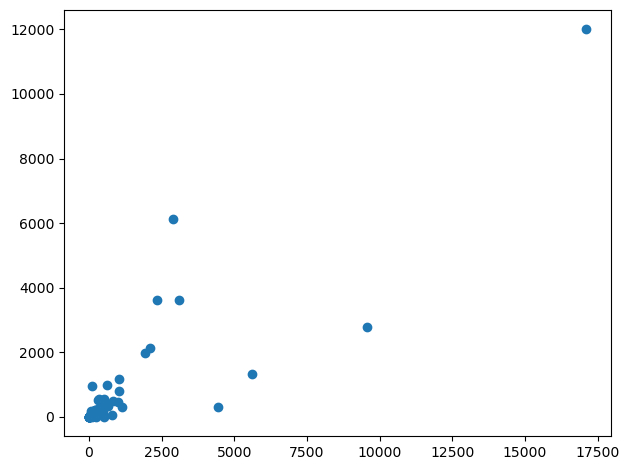

In [28]:
plt.scatter(Nuclear_half_live['Half life expt'],Nuclear_half_live['Half life theo'])

In [29]:
y_pred=Linear_regression_RGT.predict(df_test[['RGT Theo']])

In [30]:
MeanSquaredError=mean_squared_error(df_test[['RGT Expt']],y_pred)

In [31]:
MeanSquaredError

0.007652374380545729

In [32]:
dummy=pd.get_dummies(Nuclear_half_live["Name_element"])
dummy

,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
74,False,False,False,False,True,False,False,False,False,False,False
75,False,False,False,False,True,False,False,False,False,False,False
76,False,False,False,False,True,False,False,False,False,False,False
77,False,False,False,False,True,False,False,False,False,False,False


In [33]:
dummy.replace(False,'0',inplace=True)
dummy.replace(True,'1',inplace=True)

In [34]:
dummy

,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,1,0,0,0,0,0,0
75,0,0,0,0,1,0,0,0,0,0,0
76,0,0,0,0,1,0,0,0,0,0,0
77,0,0,0,0,1,0,0,0,0,0,0


In [35]:
Nuclear_half_live=pd.concat([Nuclear_half_live,dummy],axis=1)

In [36]:
Nuclear_half_live.drop(['Name_element'],axis='columns',inplace=True)

In [37]:
Nuclear_half_live

,Half life theo,Half life expt,mass number,B_GT,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,251.90,460.0,52,0.1004,0,0,0,0,0,0,0,1,0,0,0
1,268.87,461.0,53,0.1400,0,0,0,0,0,0,0,1,0,0,0
2,186.70,86.0,54,0.8950,0,0,0,0,0,0,0,1,0,0,0
3,18.51,22.0,55,0.0902,0,0,0,0,0,0,0,1,0,0,0
4,1.56,11.0,56,0.7990,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,393.00,570.0,76,0.2640,0,0,0,0,1,0,0,0,0,0,0
75,110.00,208.0,77,0.0680,0,0,0,0,1,0,0,0,0,0,0
76,51.00,147.0,78,0.2670,0,0,0,0,1,0,0,0,0,0,0
77,450.88,995.0,79,0.0560,0,0,0,0,1,0,0,0,0,0,0


In [38]:
import tensorflow as tf
from tensorflow import keras

2023-09-25 11:13:04.885537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 11:13:05.978606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-09-25 11:13:06.946779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 11:13:07.200469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 11:13:07.200717: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [40]:
mse=keras.losses.MeanSquaredError()
optimzer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [41]:
Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live[['mass number','B_GT']],Nuclear_half_live['Half life expt'],test_size=0.2)

In [42]:
Nuclear_train_x[:5]

,mass number,B_GT
15,56,0.661
31,60,0.623
49,69,0.068
45,66,0.300
40,64,0.271


In [43]:
xg_model=XGBRFRegressor(n_estimators=1000,num_parallel_tree=10)

Nuclear_train_x,Nuclear_train_y=Scaler_max.fit_transform([[Nuclear_train_x]])
Nuclear_train_x.reshape(-1,63,)
Nuclear_train_y.reshape(-1,63,)

In [44]:
xg_model.fit(Nuclear_train_x,Nuclear_train_y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=1000, n_jobs=None, num_parallel_tree=10,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [45]:
Scaler_max=MinMaxScaler()

new_dataframe=pd.concat([Nuclear_half_live,df_test],axis=1)
new_dataframem

mean_absolute_error_done=True
mean_absolute_error_value=1000
i=0
error=0
min_error=1000000
while mean_absolute_error_done:
    if (mean_absolute_error_value>100):
        Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live['mass number'],Nuclear_half_live['Half life expt'],test_size=0.2)
        xg_model.fit(Nuclear_train_x,Nuclear_train_y)
        predictions = xg_model.predict(Nuclear_test_x)
        error=mean_absolute_error(predictions, Nuclear_test_y)
        print("Mean Absolute Error : " + str(error))
        if(error<min_error):
            min_error=error
        i+=1
    else:
        mean_absolute_error_done=False
    if(i==10000):
        break
    elif(i%100==0):
        print(i)
        
print("The minimum error is "+str(min_error))

In [46]:
Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live[['mass number','B_GT']],Nuclear_half_live['Half life expt'],test_size=0.2)

Nuclear_train_x=Nuclear_train_x.to_numpy()
Nuclear_train_y=Nuclear_train_y.to_numpy()
Nuclear_train_x.reshape(63,1)
Nuclear_train_y.reshape(63,1)

In [47]:
Nuclear_train_y.shape

(63,)

In [48]:
Tensor_array_tx=tf.convert_to_tensor(Nuclear_train_x)
Tensor_array_ty=tf.convert_to_tensor(Nuclear_train_y)
Tensor_array_tex=tf.convert_to_tensor(Nuclear_test_x)
Tensor_array_tey=tf.convert_to_tensor(Nuclear_test_y)

2023-09-25 11:13:07.879238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 11:13:07.879642: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 11:13:07.879891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [49]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
sys_details = tf.sysconfig.get_build_info()
cuda = sys_details['cuda_version']
cudnn = sys_details['cudnn_version']
print(cuda, cudnn)

11.8 8


Model_Nuclear_half_life=keras.Sequential([
    keras.layers.Dense(63, activation="relu"),
    keras.layers.Dense(60, activation="tanh"),
    keras.layers.Dense(50, activation="tanh"),
    keras.layers.Dense(25, activation="tanh"),
    keras.layers.Dense(12, activation="tanh"),
    keras.layers.Dense(1, activation="softmax")
])
Model_Nuclear_half_life.compile(
    optimizer=optimzer,
    loss=mse,
    metrics=['Accuracy']
)
Model_Nuclear_half_life.fit(tf.expand_dims(Tensor_array_tx, axis=1),Tensor_array_ty,epochs=10)
Model_Nuclear_half_life.evaluate(Tensor_array_tex,Tensor_array_tey)

In [51]:
def Function_HalfLife():
    Kapa =6147
    BGT=slope_RGT
    Fnot=0
    Half_life =(Kapa)/(Fnot*BGT)